# House Prices using SpeedML

1. Setting up
2. Data Exploration & Outlier Detection & Fix
3. Feature Engineering
4. Model building & Hyperparameter Tuning
5. Model Evaluation & Prediction

## 1. Setting up

In [1]:
from speedml import Speedml

sml = Speedml('train.csv', 'test.csv', uid = 'Id', target = 'SalePrice')
sml.shape()

u'train (1460, 80) | test (1459, 79)'

In [2]:
sml.configure('overfit-threshold', sml.np.sqrt(sml.train.shape[0])/sml.train.shape[0])

{u'high_cardinality': 10,
 u'outlier_threshold': 3,
 u'outpath': u'output/',
 'overfit-threshold': 0.026171196129510684,
 u'overfit_threshold': 0.01,
 u'unique_ratio': 80}

## 2. Data Exploration & Outlier Detection & Fix

In [3]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Outliers Upper,"[LotArea, BsmtFinSF2, LowQualFinSF, BsmtHalfBa...",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (1460, 80) | test (1459, 79)",
Numerical Ratio,46%,Aim for 100% numerical.
Numerical High-cardinality,"[MSSubClass, LotFrontage, LotArea, YearBuilt, ...",(>10) categories. Use feature.density
Numerical Categorical,"[OverallQual, OverallCond, BsmtFullBath, BsmtH...",Use plot.ordinal.
Text High-cardinality,"[Exterior1st, Exterior2nd, Neighborhood]",(>10) categories. Use feature.labels.
Text Categorical,"[MasVnrType, LotConfig, GarageQual, GarageFini...",Use feature.labels or feature.mapping.
Target Analysis (SalePrice),Pre-process.,Dimensionality reduction?


In [4]:
sml.train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


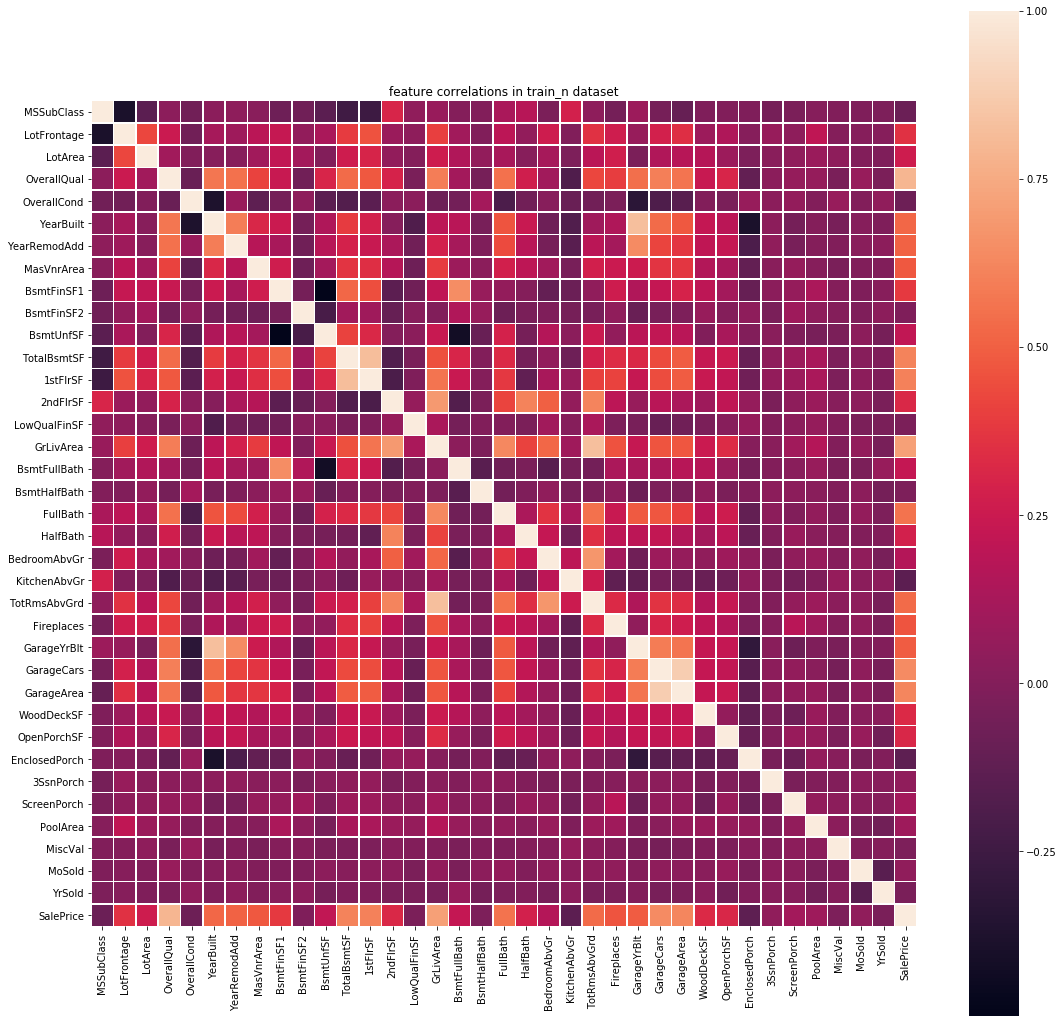

In [5]:
sml.plot.correlate()

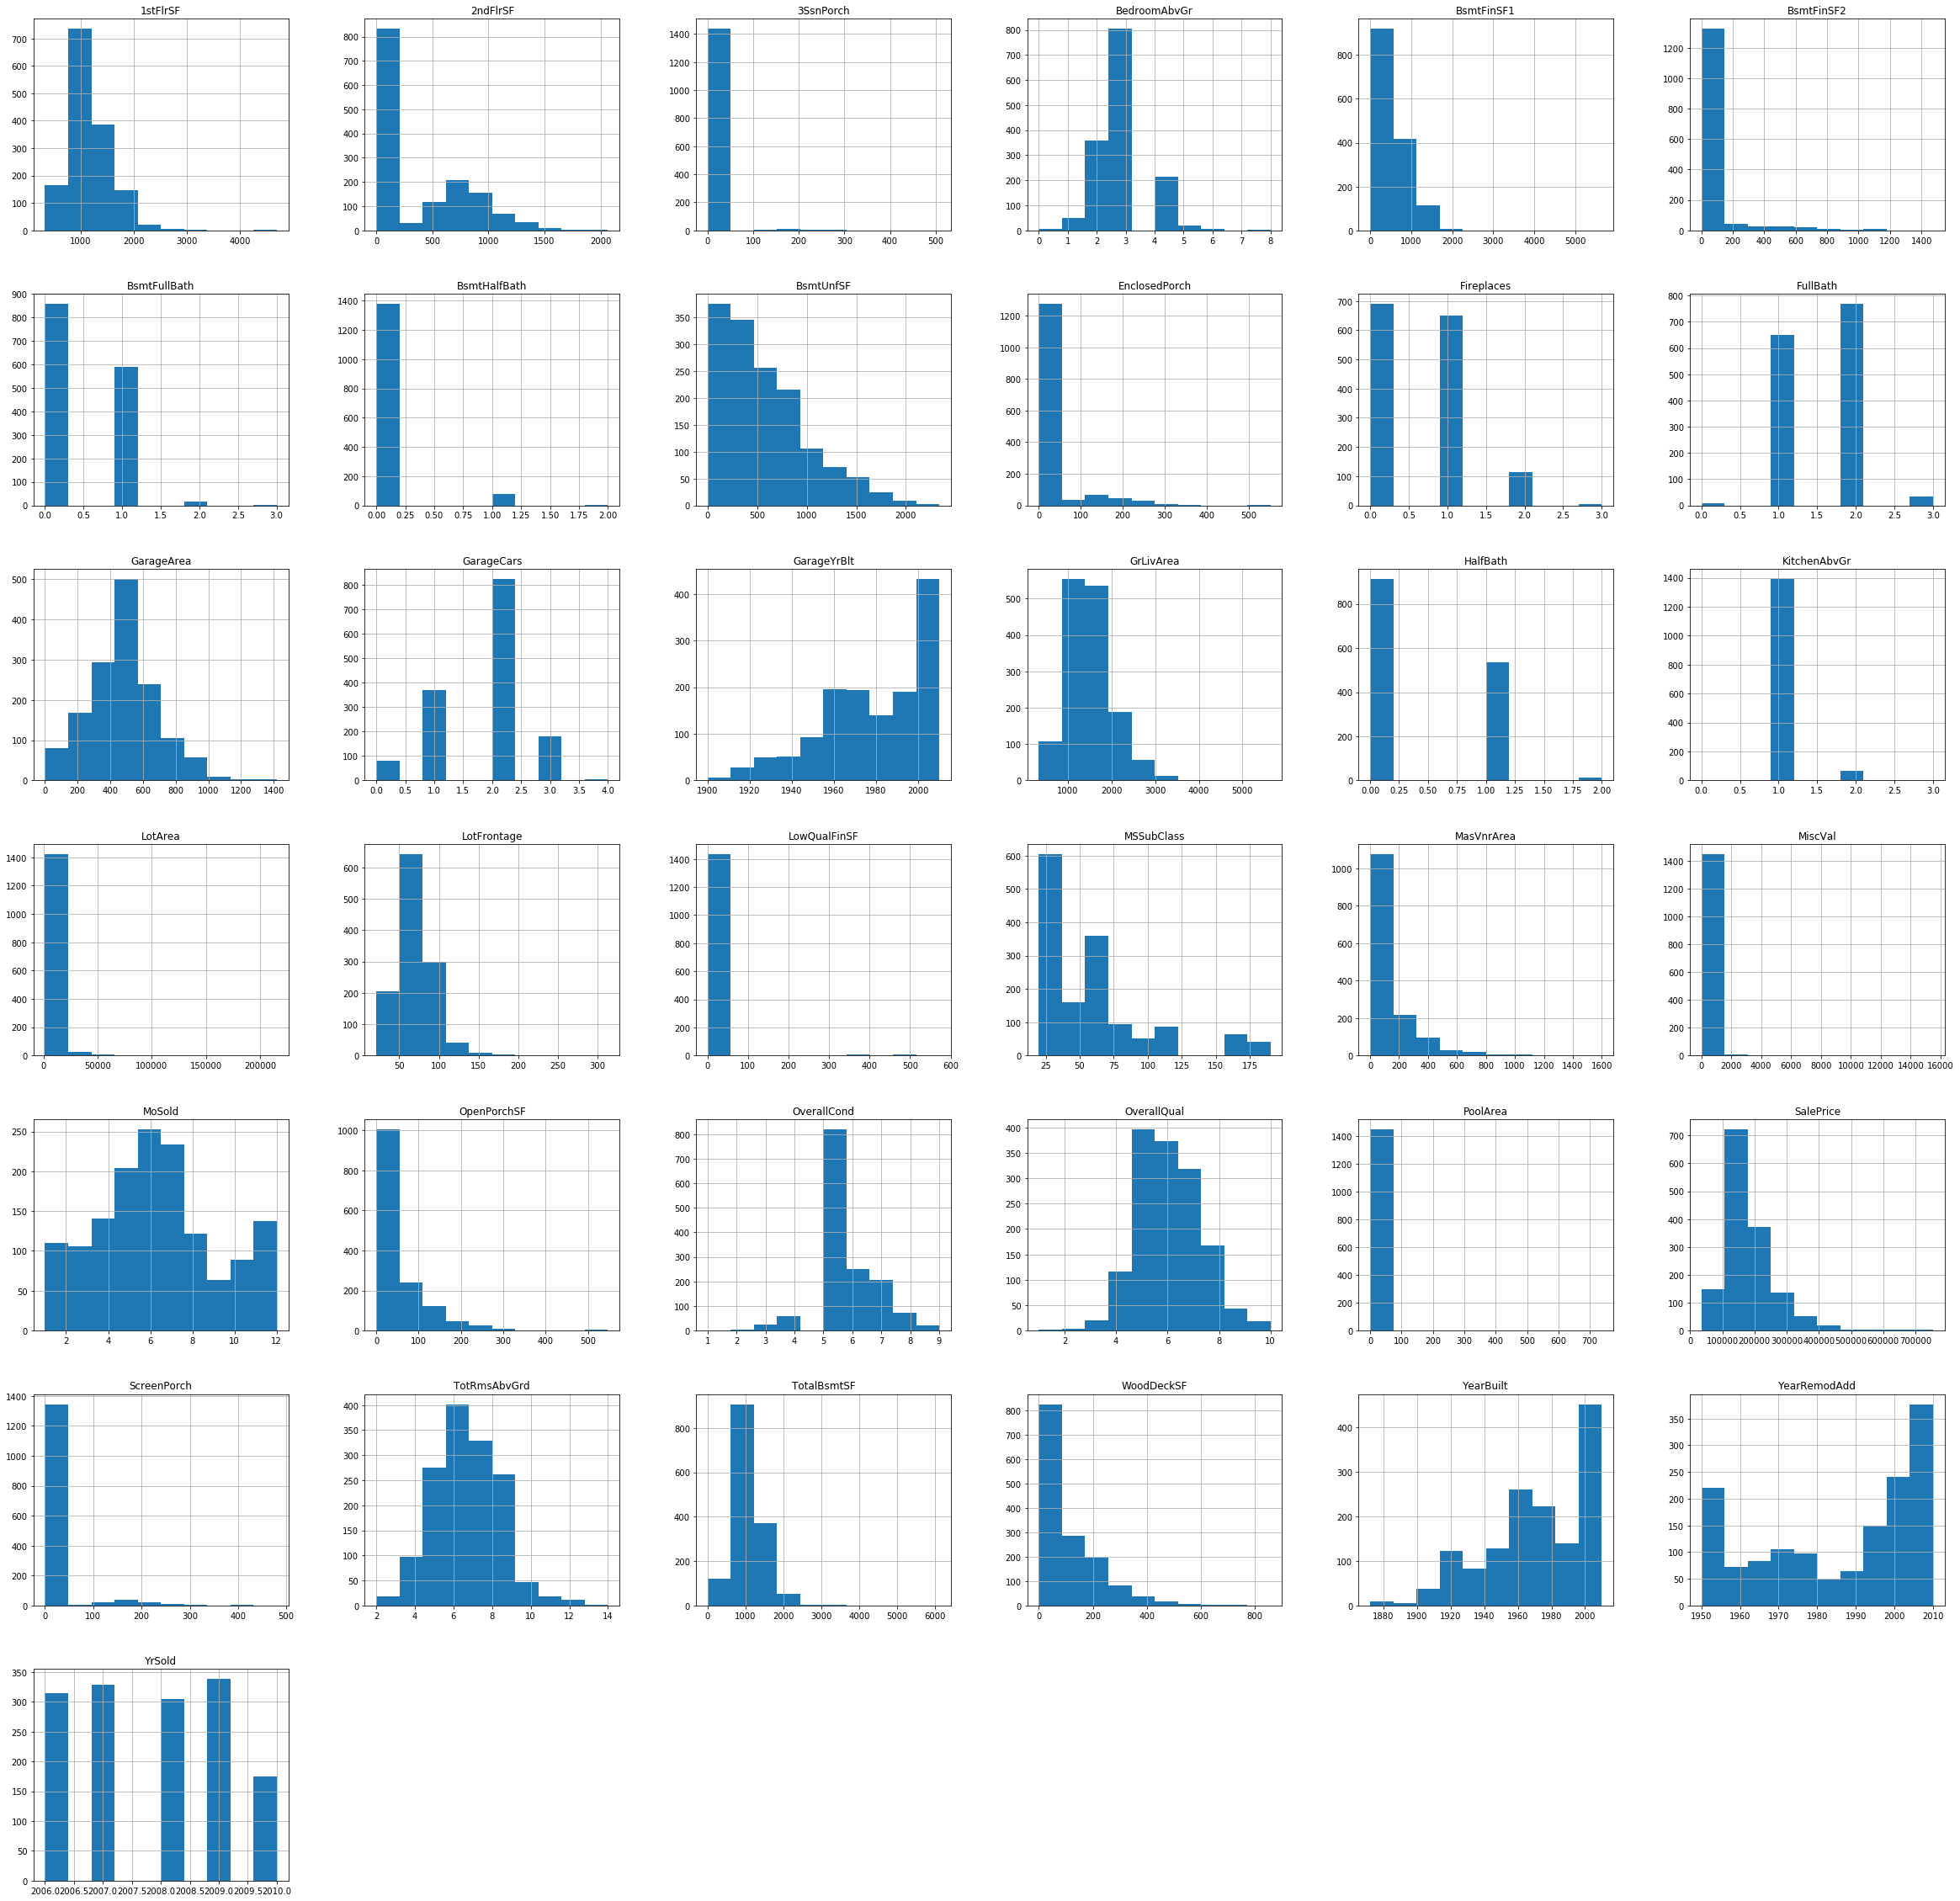

In [8]:
sml.plot.distribute()

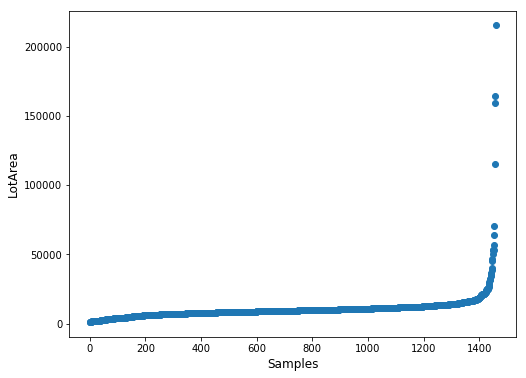

In [12]:
sml.plot.continuous('LotArea')

In [1]:
sml.train.columns

NameError: name 'sml' is not defined

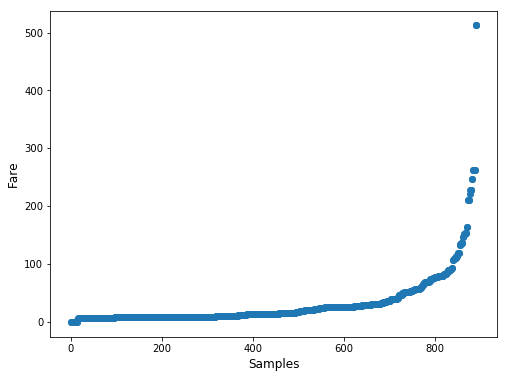

In [22]:
sml.plot.continuous('Fare')

In [23]:
sml.feature.outliers('Fare',upper=98)

u'Fixed 17 or 1.91% upper outliers. '

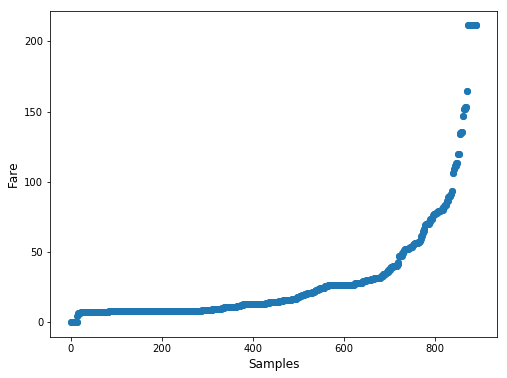

In [24]:
sml.plot.continuous('Fare')

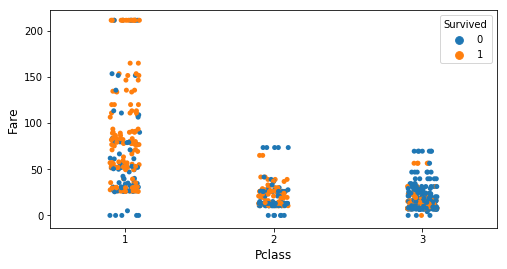

In [25]:
sml.plot.strip('Pclass', 'Fare')

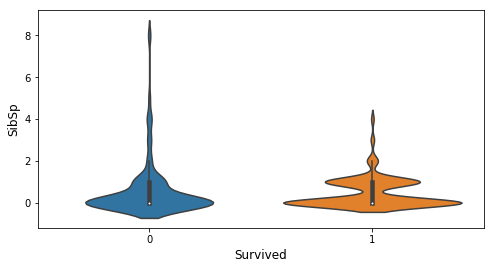

u'Fixed 12 or 1.35% upper outliers. '

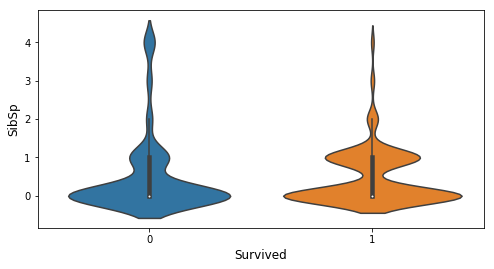

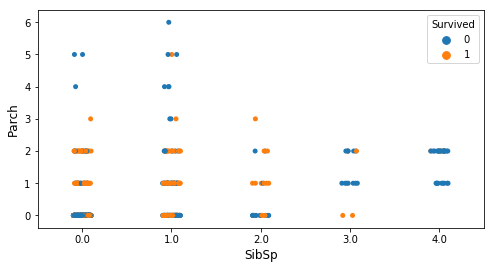

In [28]:
sml.plot.ordinal('SibSp')
sml.feature.outliers('SibSp', upper = 98)
sml.plot.ordinal('SibSp')
sml.plot.strip('SibSp', 'Parch')

# 3. Feature Engineering

In [29]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Ticket, Cabin]",(>10) categories. Use feature.labels.
Text Categorical,"[Sex, Embarked]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.
Target Analysis (Survived),Model ready.,Use classification models.


In [49]:
val = sml.train['Age'].value_counts()
dval = vals.to_dict()

sml.train['Age'+'_density'] = sml.train['Age'].apply(lambda x: dval.get(x, val.min()))

In [51]:
sml.test['Age'+'_density'] = sml.test['Age'].apply(lambda x: dval.get(x, val.min()))

In [53]:
sml.train[['Age','Age_density']].head()

,Age,Age_density
0,22.0,27
1,38.0,11
2,26.0,18
3,35.0,18
4,35.0,18


In [54]:
val = sml.train['Fare'].value_counts()
dval = vals.to_dict()

sml.train['Fare'+'_density'] = sml.train['Fare'].apply(lambda x: dval.get(x, val.min()))
sml.test['Fare'+'_density'] = sml.test['Fare'].apply(lambda x: dval.get(x, val.min()))

In [56]:
sml.train[['Fare','Fare_density']]

,Fare,Fare_density
0,7.2500,1
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,1
5,8.4583,1
6,51.8625,1
7,21.0750,1
8,11.1333,1
9,30.0708,1


In [57]:
sml.feature.drop(['Ticket', 'Fare_density'])

u'Dropped 2 features with 11 features available.'

In [59]:
sml.plot.crosstab('Survived','SibSp')

SibSp,0.0,1.0,2.0,3.0,4.0
Survived,,,,,
0,398,97,15,12,27
1,210,112,13,4,3


In [60]:
sml.plot.crosstab('Survived','Parch')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [61]:
sml.feature.sum(new='FamilySize',a='SibSp',b='Parch')

In [62]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_density,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,7.2500,NaN,S,27,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,71.2833,C85,C,11,1.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,7.9250,NaN,S,18,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,53.1000,C123,S,18,1.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,8.0500,NaN,S,18,0.0


In [63]:
sml.feature.mapping('Sex',{'male':0, 'female':1})

In [64]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_density,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1.0,0,7.2500,NaN,S,27,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0,71.2833,C85,C,11,1.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0.0,0,7.9250,NaN,S,18,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0,53.1000,C123,S,18,1.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0.0,0,8.0500,NaN,S,18,0.0


In [65]:
sml.feature.fillna(a='Cabin',new='Z')

u'Filled 1014 null values across test and train datasets.'

In [66]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_density,FamilySize
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1.0,0,7.2500,Z,S,27,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0,71.2833,C85,C,11,1.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0.0,0,7.9250,Z,S,18,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0,53.1000,C123,S,18,1.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0.0,0,8.0500,Z,S,18,0.0


In [67]:
sml.feature.extract(new='Deck', a='Cabin', regex='([A-Z]){1}')
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_density,FamilySize,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1.0,0,7.2500,Z,S,27,1.0,Z
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0,71.2833,C85,C,11,1.0,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0.0,0,7.9250,Z,S,18,0.0,Z
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0,53.1000,C123,S,18,1.0,C
4,0,3,"Allen, Mr. William Henry",0,35.0,0.0,0,8.0500,Z,S,18,0.0,Z


In [68]:
sml.feature.drop('Cabin')

u'Dropped 1 features with 12 features available.'

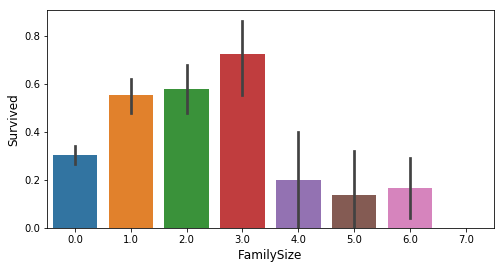

In [69]:
sml.plot.bar('FamilySize','Survived')

In [70]:
sml.feature.drop(['SibSp', 'Parch'])

u'Dropped 2 features with 10 features available.'

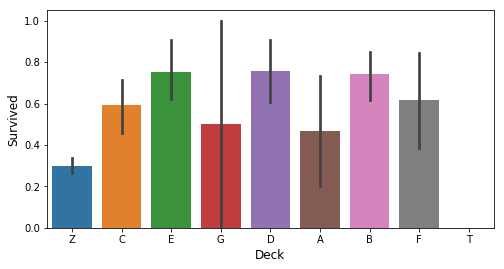

In [71]:
sml.plot.bar('Deck','Survived')

In [72]:
sml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
Fare           891 non-null float64
Embarked       889 non-null object
Age_density    891 non-null int64
FamilySize     891 non-null float64
Deck           891 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 69.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
Fare           417 non-null float64
Embarked       418 non-null object
Age_density    418 non-null int64
FamilySize     418 non-null int64
Deck           418 non-null object
dtypes: float64(2), int64

In [73]:
sml.feature.impute()

u'Imputed 179 empty values to 0.'

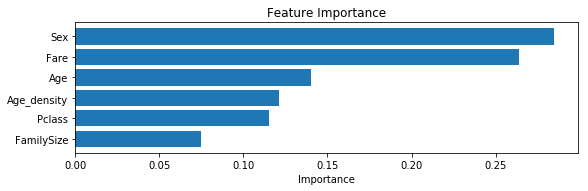

In [77]:
sml.plot.importance()

In [78]:
sml.feature.extract(new='Title',a='Name', regex=' ([A-Za-z]+)\.')
sml.plot.crosstab('Title', 'Sex')

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [79]:
sml.feature.replace(a='Title', match=['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], new='Rare')
sml.feature.replace(a='Title', match=['Mlle', 'Ms'], new='Miss')
sml.feature.replace('Title', 'Mme', 'Mrs')

u'Replaced matching list of strings across train and test datasets.'

u'Replaced matching list of strings across train and test datasets.'

u'Replaced matching list of strings across train and test datasets.'

In [80]:
sml.train[['Name', 'Title']].head

<bound method DataFrame.head of                                                   Name   Title
0                              Braund, Mr. Owen Harris      Mr
1    Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                               Heikkinen, Miss. Laina    Miss
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                             Allen, Mr. William Henry      Mr
5                                     Moran, Mr. James      Mr
6                              McCarthy, Mr. Timothy J      Mr
7                       Palsson, Master. Gosta Leonard  Master
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs
9                  Nasser, Mrs. Nicholas (Adele Achem)     Mrs
10                     Sandstrom, Miss. Marguerite Rut    Miss
11                            Bonnell, Miss. Elizabeth    Miss
12                      Saundercock, Mr. William Henry      Mr
13                         Andersson, Mr. Anders Johan      Mr
14                Vestr

In [81]:
sml.train.head()

,Age,Age_density,Deck,Embarked,FamilySize,Fare,Name,Pclass,Sex,Survived,Title
0,22.0,27,Z,S,1.0,7.2500,"Braund, Mr. Owen Harris",3,0,0,Mr
1,38.0,11,C,C,1.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,Mrs
2,26.0,18,Z,S,0.0,7.9250,"Heikkinen, Miss. Laina",3,1,1,Miss
3,35.0,18,C,S,1.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,Mrs
4,35.0,18,Z,S,0.0,8.0500,"Allen, Mr. William Henry",3,0,0,Mr


In [82]:
sml.feature.drop('Name')

u'Dropped 1 features with 10 features available.'

In [83]:
sml.feature.labels(['Deck', 'Title', 'Embarked'])
sml.train.head()

,Age,Age_density,Deck,Embarked,FamilySize,Fare,Pclass,Sex,Survived,Title
0,22.0,27,8,2,1.0,7.2500,3,0,0,3
1,38.0,11,2,0,1.0,71.2833,1,1,1,4
2,26.0,18,8,2,0.0,7.9250,3,1,1,2
3,35.0,18,2,2,1.0,53.1000,1,1,1,4
4,35.0,18,8,2,0.0,8.0500,3,0,0,3


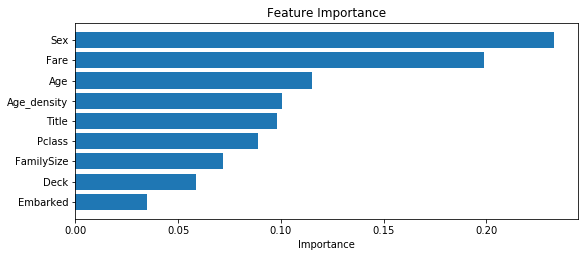

In [84]:
sml.plot.importance()

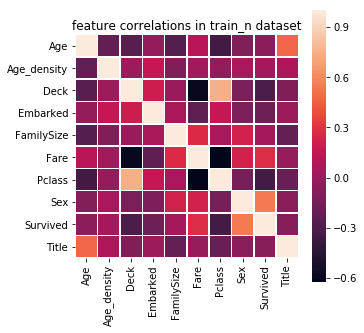

In [85]:
sml.plot.correlate()

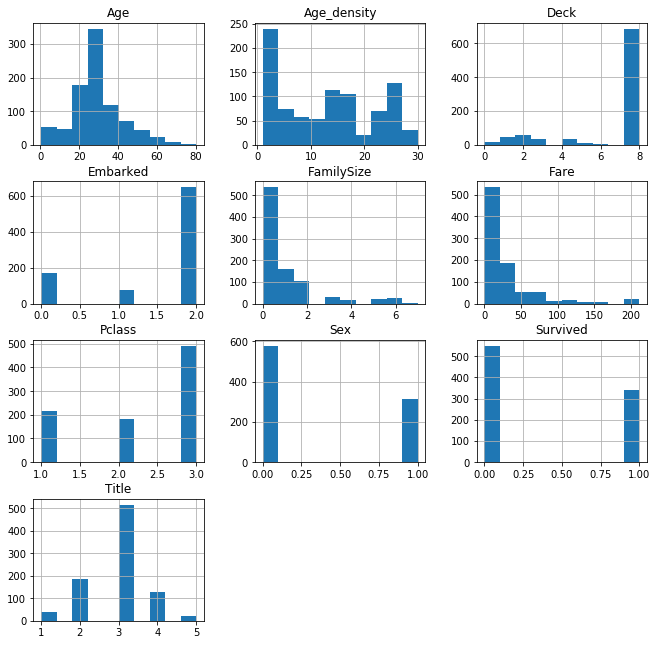

In [86]:
sml.plot.distribute()

In [87]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Shape,"train (891, 10) | test (418, 9)",
Numerical High-cardinality,"[Age, Age_density, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Deck, Embarked, FamilySize, Pclass, Sex, Surv...",Use plot.ordinal.
Target Analysis (Survived),Model ready.,Use classification models.


## 4. Model building & Hyperparameter Tuning

In [89]:
sml.model.data()

u'train_X: (891L, 9L) train_y: (891L,) test_X: (418L, 9L)'

In [90]:
select_params = {'max_depth':[3,5,7], 'min_child_weight':[1,3,5]}
fixed_params = {'learning_rate':0.1, 'subsample':0.8, 'colsample_bytree':0.8, 'seed':10, 'objective':'binary:logistic'}
sml.xgb.hyper(select_params, fixed_params)

C:\Users\Elijah Toppo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Elijah Toppo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Elijah Toppo\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please se

,rank,params
5,1,"{u'max_depth': 5, u'min_child_weight': 5}"
3,2,"{u'max_depth': 5, u'min_child_weight': 1}"
4,3,"{u'max_depth': 5, u'min_child_weight': 3}"
7,4,"{u'max_depth': 7, u'min_child_weight': 3}"
8,4,"{u'max_depth': 7, u'min_child_weight': 5}"
6,6,"{u'max_depth': 7, u'min_child_weight': 1}"
0,7,"{u'max_depth': 3, u'min_child_weight': 1}"
1,8,"{u'max_depth': 3, u'min_child_weight': 3}"
2,8,"{u'max_depth': 3, u'min_child_weight': 5}"


In [92]:
select_params = {'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1]}
fixed_params = {'learning_rate':0.1, 'min_child_weight':5, 'max_depth':5, 'colsample_bytree':0.8, 'seed':10, 'objective':'binary:logistic'}
sml.xgb.hyper(select_params, fixed_params)

,rank,params
3,1,{u'subsample': 0.8}
2,2,{u'subsample': 0.7}
4,2,{u'subsample': 0.9}
1,4,{u'subsample': 0.6}
5,5,{u'subsample': 1}
0,6,{u'subsample': 0.5}


# Title mapping

In [93]:
tuned_params = {'learning_rate':0.1, 'min_child_weight':5,'subsample':0.8,
                'max_depth':5, 'colsample_bytree':0.8, 'seed':10,
                'objective':'binary:logistic'}
sml.xgb.cv(tuned_params)

[23:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[23:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[23:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[23:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[23:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[23:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[23:35:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [97]:
sml.xgb.cv_results.tail()

,test-error-mean,test-error-std,train-error-mean,train-error-std
22,0.172877,0.021966,0.138330,0.006181
23,0.170629,0.020213,0.136647,0.004200
24,0.170629,0.017537,0.135804,0.003982
25,0.168376,0.013098,0.134964,0.005786
26,0.166129,0.011855,0.133561,0.006796


In [98]:
tuned_params['n_estimators'] = sml.xgb.cv_results.shape[0]-1
sml.xgb.params(tuned_params)

In [220]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

## 5. Model Evaluation & Predictions

In [99]:
sml.xgb.classifier()

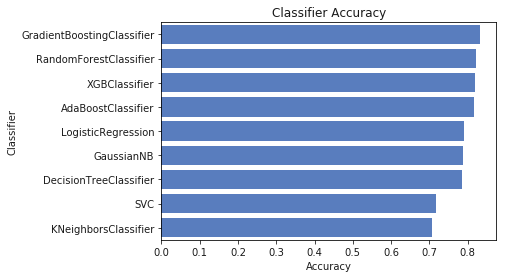

In [100]:
sml.model.evaluate()
sml.plot.model_ranks()

In [101]:
sml.model.ranks()

,Classifier,Accuracy
0,GradientBoostingClassifier,0.833333
0,RandomForestClassifier,0.823333
0,XGBClassifier,0.820000
0,AdaBoostClassifier,0.816667
0,LogisticRegression,0.790000
0,GaussianNB,0.787778
0,DecisionTreeClassifier,0.784444
0,SVC,0.716667
0,KNeighborsClassifier,0.706667


In [115]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

In [119]:
clf.fit(sml.train_X, sml.train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [120]:
predictions = clf.predict(sml.test_X)

In [121]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [130]:
submit = sml.pd.DataFrame(
{
    'PassengerId':sml.uid,
    'Survived':predictions
})
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [131]:
submit.to_csv('submissions3.csv',index=False)

In [109]:
sml.xgb.fit()
sml.xgb.predict()

In [111]:
sml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
Age            891 non-null float64
Age_density    891 non-null int64
Deck           891 non-null int64
Embarked       891 non-null int64
FamilySize     891 non-null float64
Fare           891 non-null float64
Pclass         891 non-null int64
Sex            891 non-null int64
Survived       891 non-null int64
Title          891 non-null int64
dtypes: float64(3), int64(7)
memory usage: 116.6 KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
Age            418 non-null float64
Age_density    418 non-null int64
Deck           418 non-null int64
Embarked       418 non-null int64
FamilySize     418 non-null float64
Fare           418 non-null float64
Pclass         418 non-null int64
Sex            418 non-null int64
Title          418 non-null int64
dtypes: float64(3), int64(6)
memory usag

In [112]:
sml.xgb.sample_accuracy()

TypeError: 'float' object is not callable

In [105]:
sml.save_results(
    columns={ 'PassengerId': sml.uid,
             'Survived': sml.xgb.predictions }, 
    file_path='submission3.csv')


u'Accuracy = 86.53%. Found 771 correct of 891 total labels'